### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the MNIST data

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Let's check the first image

In [4]:
image_1 = X_train[0]
image_1.shape

(28, 28)

In [5]:
image_1 #outputs a 2D array of shape 28x28 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

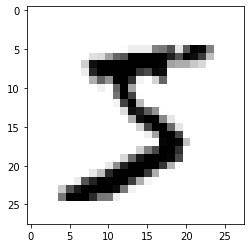

In [6]:
plt.imshow(image_1, cmap='binary')  

In [7]:
#Looks like the first image in X_train is 5. Let us see the actual output in y_train
y_train[0]

5

 ### For easier and faster computation, we need to scale the X_train and X_test values between 0 to 1

### Since the X_train and X_test has min value as 0 and max value as 255, we divide the values by 255

In [8]:
X_train = X_train/255

In [9]:
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### We also need to one-hot encode our labels

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [13]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
print(X_train.shape)
print(y_train_cat.shape)
print(X_test.shape)
print(y_test_cat.shape)

print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)
(60000,)
(10000,)


#### We also need to mention what kind of image this is. All images here are grayscale images, i.e. having only 1 color channel, unlike RGB which has 3 color channels
#### Hence to mention it we need to reshape our image arrays from 3-dim to 4-dim

In [16]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

### Convolutional Model Creation

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Model Summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Model Compilation

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Applying Early Stopping to prevent Overfitting

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss')

model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat), callbacks=[earlystop])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2849 - accuracy: 0.9107 - val_loss: 0.0506 - val_accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0300 - val_accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0249 - val_accuracy: 0.9916
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0223 - val_accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0267 - val_accuracy: 0.9912


### Training Loss vs Validation Loss

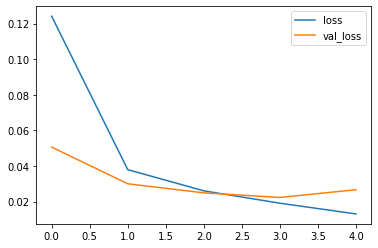

In [21]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

### Training Accuracy vs Validation Accuracy

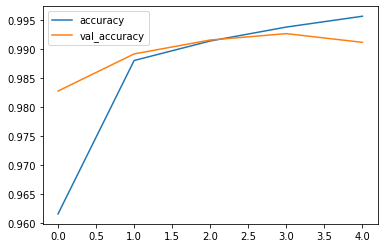

In [22]:
metrics[['accuracy','val_accuracy']].plot()

### Evaluation of the above metrics

In [23]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_cat)
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(train_loss, train_accuracy)
print(test_loss, test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0267 - accuracy: 0.9912
0.009288226254284382 0.9968166947364807
0.02668899856507778 0.9911999702453613


### Model Prediction

In [24]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

#### *Confusion Matrix Results*

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 971,    0,    3,    0,    1,    0,    3,    1,    1,    0],
       [   0, 1129,    2,    0,    1,    0,    2,    1,    0,    0],
       [   0,    3, 1026,    1,    1,    0,    0,    1,    0,    0],
       [   0,    1,    0, 1005,    0,    3,    0,    0,    1,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   1,    0,    0,    8,    0,  881,    2,    0,    0,    0],
       [   1,    2,    0,    0,    1,    1,  953,    0,    0,    0],
       [   0,    2,    8,    0,    0,    0,    0, 1017,    1,    0],
       [   2,    0,    4,    0,    0,    1,    0,    1,  965,    1],
       [   0,    2,    0,    3,    9,    3,    0,    4,    4,  984]])

#### *Classification Report Results*

In [26]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       980\n           1       0.99      0.99      0.99      1135\n           2       0.98      0.99      0.99      1032\n           3       0.99      1.00      0.99      1010\n           4       0.99      1.00      0.99       982\n           5       0.99      0.99      0.99       892\n           6       0.99      0.99      0.99       958\n           7       0.99      0.99      0.99      1028\n           8       0.99      0.99      0.99       974\n           9       1.00      0.98      0.99      1009\n\n    accuracy                           0.99     10000\n   macro avg       0.99      0.99      0.99     10000\nweighted avg       0.99      0.99      0.99     10000\n'

#### *Checking the prediction on our own choosen image*

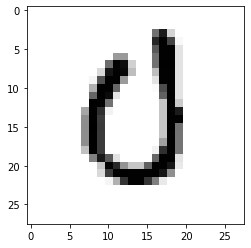

In [34]:
X_test_user = X_test[723].reshape(28,28)
plt.imshow(X_test_user, cmap='binary')

In [35]:
print(y_pred[723])

0
